## Import data and libraries 

In [1]:
# libraries for data handling
import numpy as np
import pandas as pd

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# set visualisation
%matplotlib inline
sns.set_style("whitegrid")

Source of data: https://www.kaggle.com/datasets/abcsds/pokemon

In [2]:
#import data
pokemon = pd.read_csv("Pokemon.csv",)
pokemon.drop("#", axis=1, inplace = True)

# Overview of data

In [3]:
#outline of the dataset
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [4]:
# first few rows of the datset
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# number of unique pokemon
print("There are", pokemon["Name"].nunique(), "pokemons.")

There are 800 pokemons.


In [6]:
#pokemon with only a type 1. 
print( pokemon['Type 2'].isnull().sum(), "pokemon do not have a type 2.")

386 pokemon do not have a type 2.


In [7]:
# description of the numerical values in the datset
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
# confirm that total is an aggregate of other stats
pokemon["check"] = pokemon[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis = 1)

if sum(pokemon[pokemon["check"]!=pokemon["Total"]].any()) == 0: 
    print("Total equals sum of all other stats.")
else:
    print("Total includes other variables not included in the dataset.")
    

pokemon.drop("check", axis = 1, inplace = True)

Total equals sum of all other stats.


## Weak Pokemon

In [9]:
# pokemon with the lowest HP
pokemon[pokemon["HP"]==1]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [10]:
# pokemon with lowest attack
pokemon[pokemon["Attack"]< 6]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
488,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [11]:
# pokemon with lowest Defense
pokemon[pokemon["Defense"]< 6]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
488,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [12]:
# pokemon with the lowest total stats
pokemon[pokemon["Total"]==pokemon["Total"].min()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


# Distribution of the stats 
## Attack

<Figure size 1440x720 with 0 Axes>

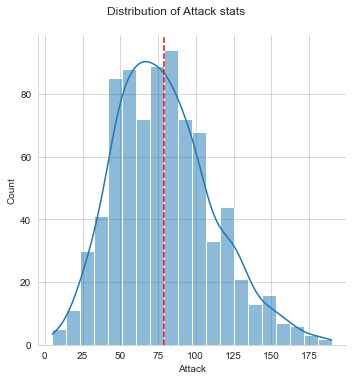

In [13]:
# distribution of attack stats
plt.figure(figsize=(20,10))
sns.displot(x = "Attack", data = pokemon,kde = True)
plt.axvline(pokemon["Attack"].mean(), ls = "--", color = "red")
plt.suptitle("Distribution of Attack stats", y =1.05)
plt.show()

<Figure size 1440x720 with 0 Axes>

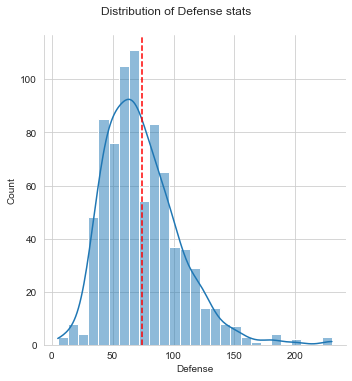

In [14]:
# distribution of defense stats
plt.figure(figsize=(20,10))
sns.displot(x = "Defense", data = pokemon, kde = True)
plt.axvline(pokemon["Defense"].mean(), ls = "--", color = "red")
plt.suptitle("Distribution of Defense stats", y =1.05)
plt.show()

<Figure size 864x720 with 0 Axes>

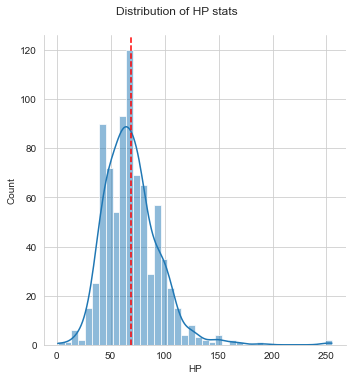

In [15]:
# distribution of HP stats
plt.figure(figsize=(12,10))
sns.displot(x = "HP", data = pokemon, kde = True)
plt.axvline(pokemon["HP"].mean(), ls = "--", color = "red")
plt.suptitle("Distribution of HP stats", y =1.05)
plt.show()

<Figure size 864x720 with 0 Axes>

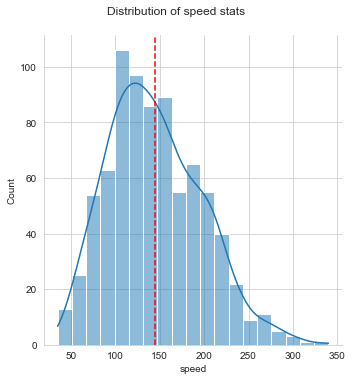

In [16]:
# distribution of attack/defence speed stats
pokemon["speed"] = pokemon['Sp. Atk']+pokemon['Sp. Def']

plt.figure(figsize=(12,10))
sns.displot(x = "speed", data = pokemon, kde = True)
plt.axvline(pokemon["speed"].mean(), ls = "--", color = "red")
plt.suptitle("Distribution of speed stats",y =1.05)
plt.show()

<Figure size 864x720 with 0 Axes>

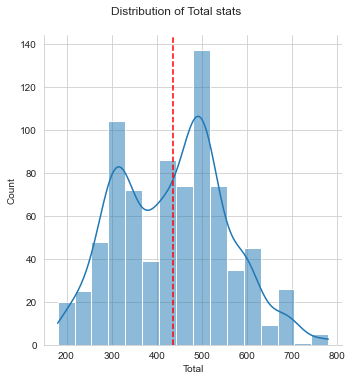

In [17]:
# distribution of total stats
plt.figure(figsize=(12,10))
sns.displot(x = "Total", data = pokemon, kde = True)
plt.axvline(pokemon["Total"].mean(), ls = "--", color = "red")
plt.suptitle("Distribution of Total stats",y =1.05)
plt.show()

# Type 1

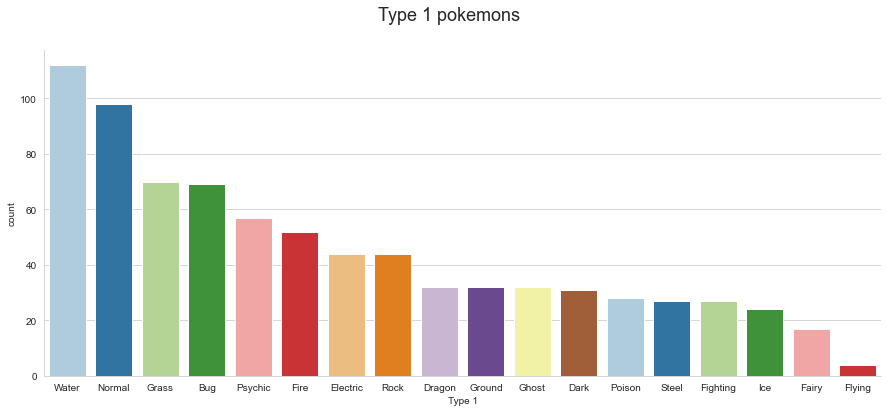

In [18]:
# distribution of type 1 stats
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", data=pokemon, order = pokemon['Type 1'].value_counts().index, palette = "Paired")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Type 1 pokemons", fontsize = 18)
plt.show()

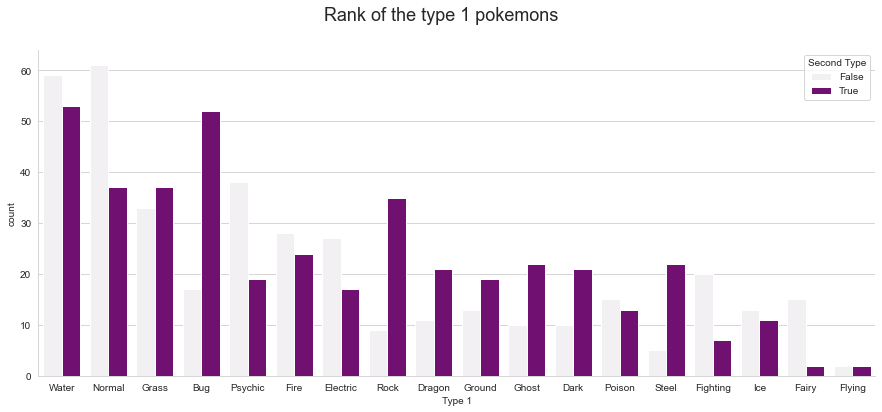

In [19]:
# create a variable of whether a pokemon has a second type or not
pokemon["Type 2"]
pokemon['Second Type'] =  np.where(pokemon["Type 2"].isnull(), False, True)


# distribution of type 1 and second types. 
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", hue = "Second Type", data=pokemon, order = pokemon[ "Type 1"].value_counts().index, color = "purple")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Rank of the type 1 pokemons ", fontsize = 18)
plt.show()

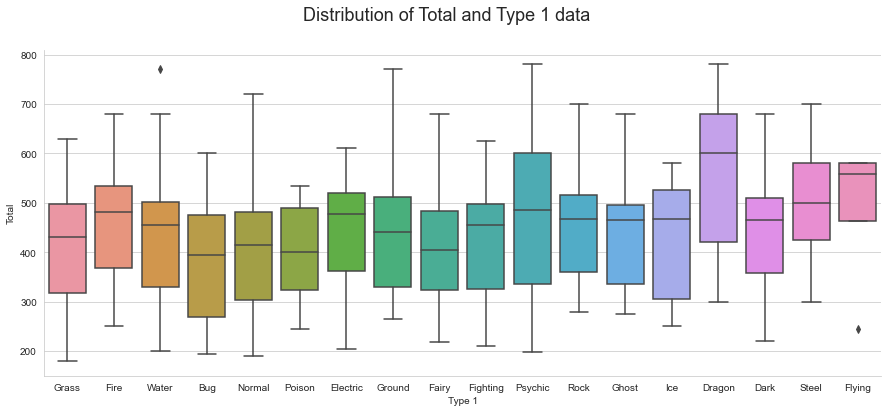

In [20]:
# distribution of type 1 and total stats
plt.figure(figsize=(15,6))
sns.boxplot(x = "Type 1", y = "Total", data = pokemon)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of Total and Type 1 data ", fontsize = 18)
plt.show()

# Type 2

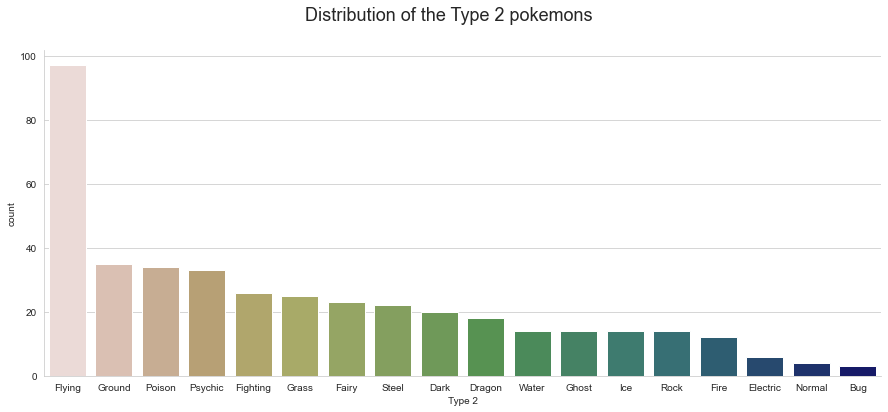

In [21]:
# distribution of type 2

plt.figure(figsize=(15,6))
sns.countplot(x="Type 2", data=pokemon, order = pokemon['Type 2'].value_counts().index, palette = "gist_earth_r")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of the Type 2 pokemons", fontsize = 18)
plt.show()

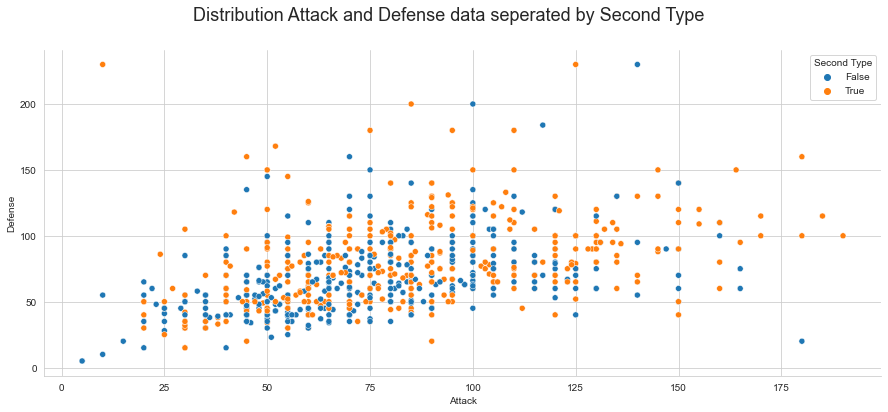

In [22]:
# distribution of attack and defense seperated by second type
plt.figure(figsize=(15,6))

sns.scatterplot(x ="Attack", y = "Defense", data = pokemon, hue = "Second Type",  )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution Attack and Defense data seperated by Second Type", fontsize = 18)
plt.show()

# Further review of Type 1 and Type 2
## Water Pokemons

In [23]:
# extracting water pokemon and set missing type to to "no type"
Water = pokemon[pokemon["Type 1"] == "Water"].fillna("No type")

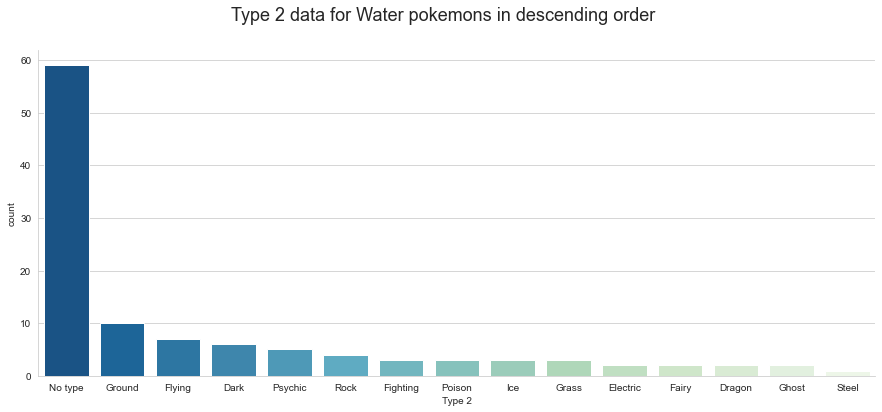

In [24]:
# distribution of type 2 for water pokemon

plt.figure(figsize=(15,6))
sns.countplot(x = "Type 2", data = Water, palette ="GnBu_r", order = Water['Type 2'].value_counts().index)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Type 2 data for Water pokemons in descending order", fontsize = 18)
plt.show()

In [25]:
# water pokemon with a steel type 2
pokemon[(pokemon["Type 1"] == "Water") & (pokemon["Type 2"] == "Steel") ]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed,Second Type
440,Empoleon,Water,Steel,530,84,86,88,111,101,60,4,False,212,True


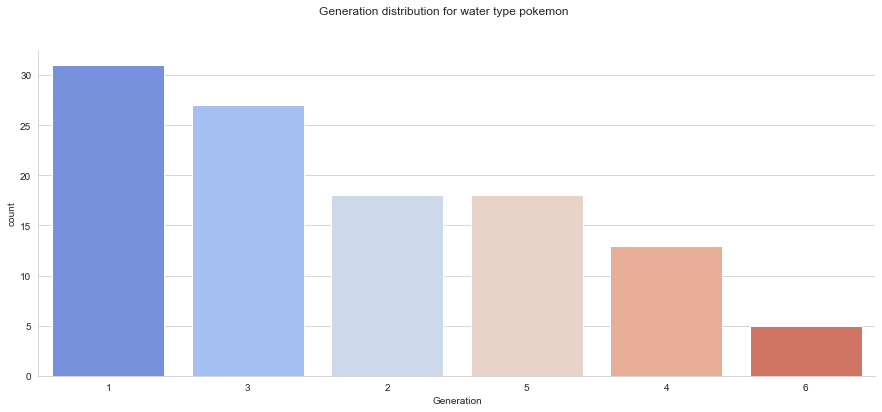

In [26]:
# distribution of generation data for water pokemon
plt.figure(figsize=(15,6))
sns.countplot(x = "Generation" , data = Water, palette ="coolwarm", order = Water['Generation'].value_counts().index)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Generation distribution for water type pokemon")
plt.show()

## Dragon Pokemons

In [27]:
# extracting dragon pokemon and set missing type to to "no type"

Dragon = pokemon[pokemon["Type 1"] == "Dragon"].fillna("No type")

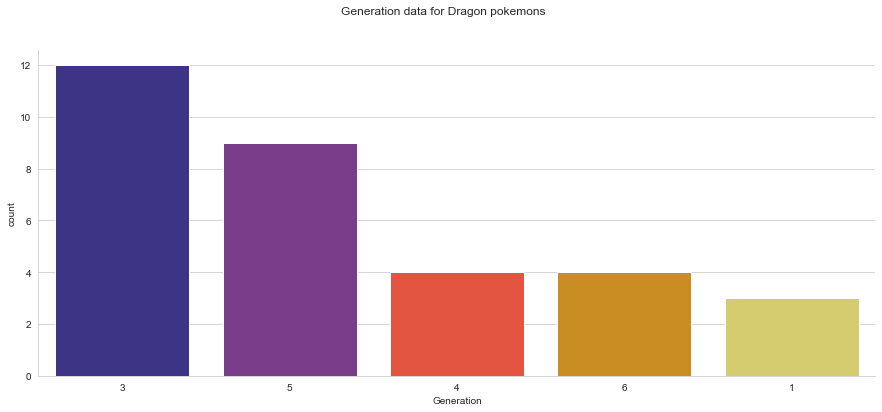

In [28]:
# distribution of generation data for dragon pokemon

plt.figure(figsize=(15,6))
sns.countplot(x = "Generation" , data = Dragon, palette ="CMRmap", order = Dragon['Generation'].value_counts().index)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Generation data for Dragon pokemons")
plt.show()

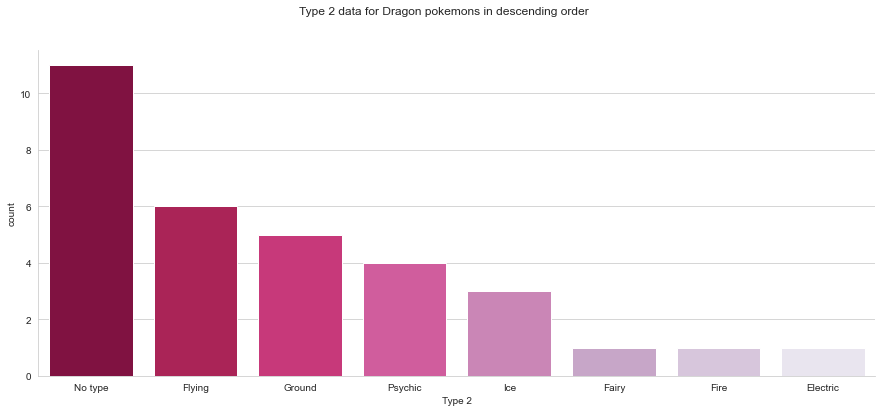

In [29]:
# distribution of type 2 data for dragon pokemon

plt.figure(figsize=(15,6))
sns.countplot(x = "Type 2", data = Dragon, palette ="PuRd_r", order = Dragon['Type 2'].value_counts().index)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Type 2 data for Dragon pokemons in descending order")
plt.show()

# Generation

In [30]:
# first generation pokemons
gen1 = pokemon[pokemon["Generation"] == 1]

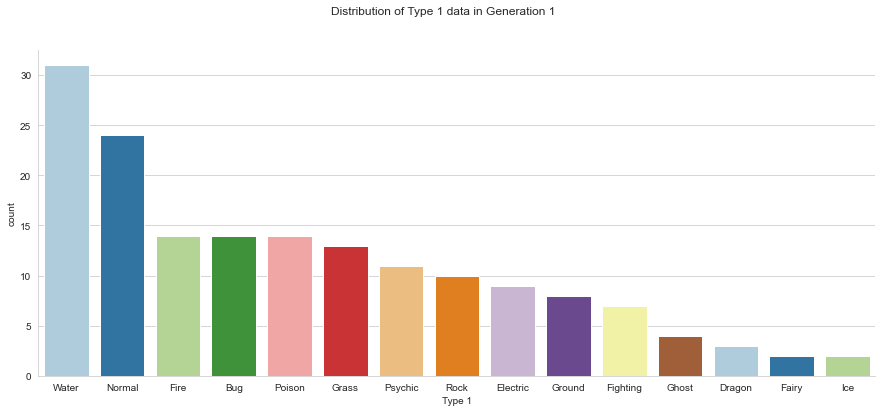

In [31]:
# distribution of type 1 data for generation 1
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", data=gen1, order = gen1['Type 1'].value_counts().index, palette = "Paired")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of Type 1 data in Generation 1")
plt.show()

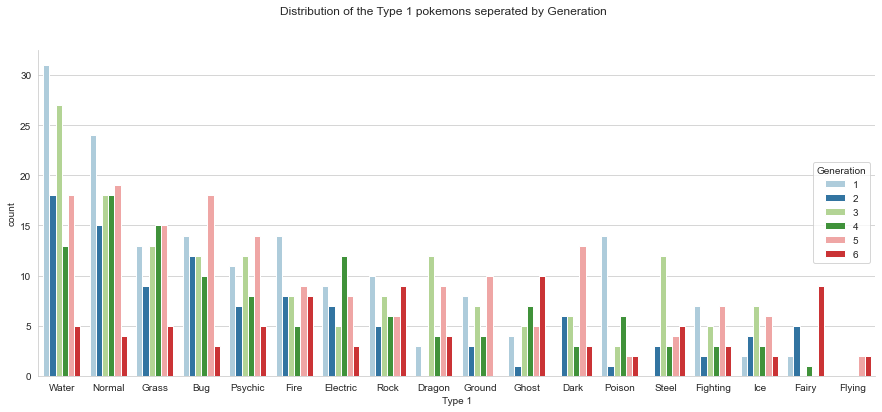

In [32]:
# distribution of type 1 data seperated by generation

plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", data=pokemon,  hue = "Generation", order = pokemon['Type 1'].value_counts().index, palette = "Paired")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of the Type 1 pokemons seperated by Generation")
plt.legend(loc='center right', title ="Generation" )
plt.show()

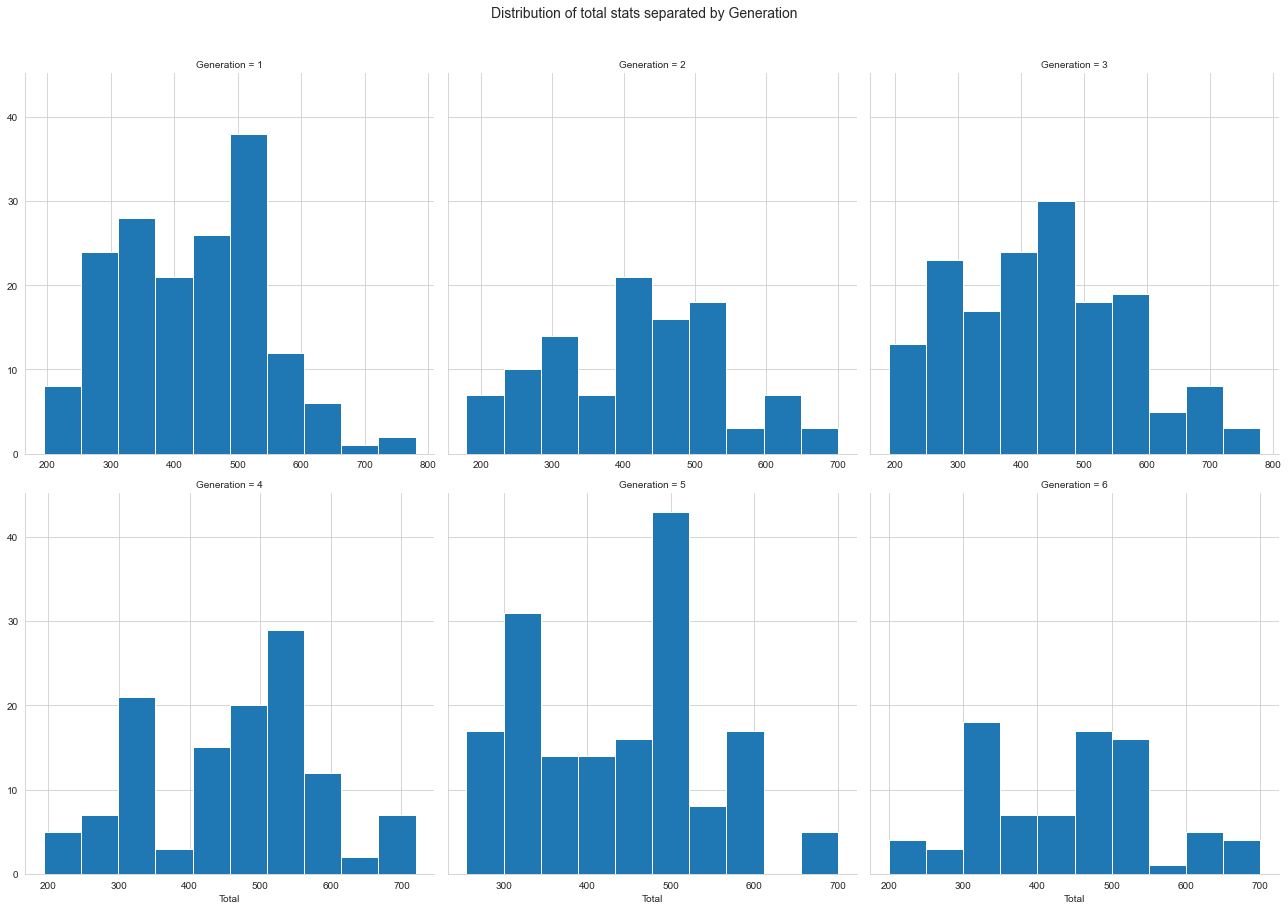

In [33]:
# distribution of total stats seperated by generation

g = sns.FacetGrid(pokemon, col = "Generation", sharex=False, col_wrap = 3,height = 6)
g.map(plt.hist, "Total",)
plt.suptitle("Distribution of total stats separated by Generation", y=1.05, fontsize = 14)
plt.show()

# Legendary Pokemons

In [34]:
print("There are", sum(pokemon["Legendary"] == True), "pokemon with legendary status")

There are 65 pokemon with legendary status


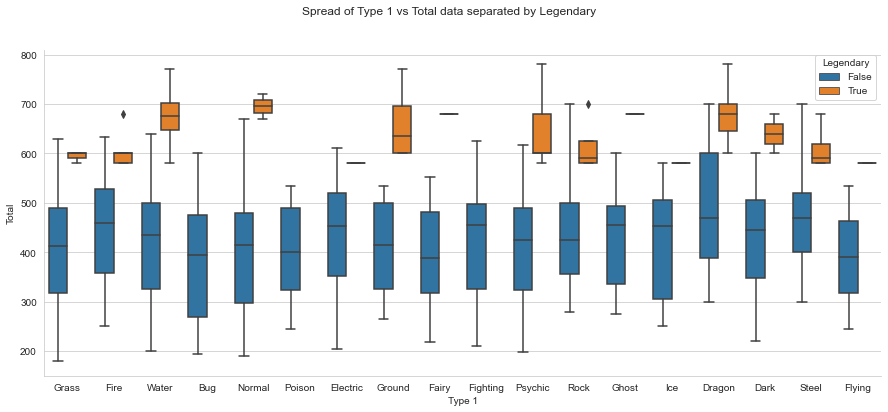

In [35]:
# distribution of total stats seperated by legendary status
plt.figure(figsize=(15,6))
sns.boxplot(x = "Type 1", y = "Total", data = pokemon, hue = "Legendary")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Spread of Type 1 vs Total data separated by Legendary")
plt.show()
# Regardless of the type of pokemon, if you secure a legendary pokemon, it is likely to have signficantly better total stats than non legendary pokemons

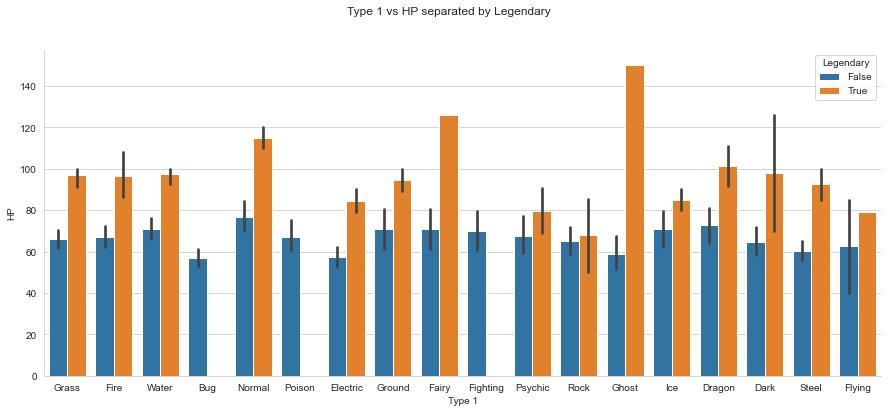

In [36]:
# distribution of type 1 stats seperated by legendary status
plt.figure(figsize=(15,6))
sns.barplot(x = "Type 1", y = "HP", data = pokemon, hue = "Legendary")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Type 1 vs HP separated by Legendary")
plt.show()

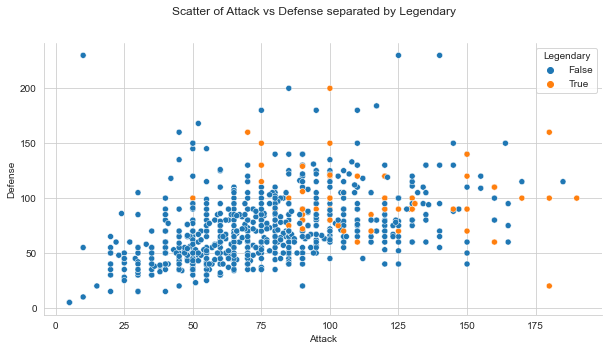

In [37]:
# distribution of attack and defense stats seperated by legendary status
plt.figure(figsize=(10,5))
sns.scatterplot(x = "Attack", y= "Defense", hue = "Legendary", data = pokemon,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Scatter of Attack vs Defense separated by Legendary")
plt.show()

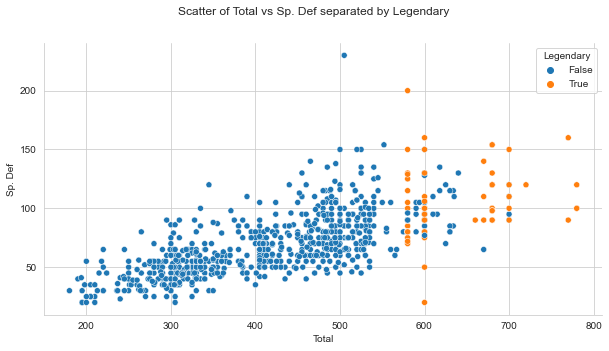

In [38]:
# distribution of total and sp.def stats seperated by legendary status
plt.figure(figsize=(10,5))
sns.scatterplot(x = "Total", y= "Sp. Def", hue = "Legendary", data = pokemon,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Scatter of Total vs Sp. Def separated by Legendary")
plt.show()
#fig = px.scatter(pokemon,x = "Total", y= "Sp. Def", color="Legendary", title = "Scatter of Total vs Sp. Def separated by Legendary")
#fig.show()

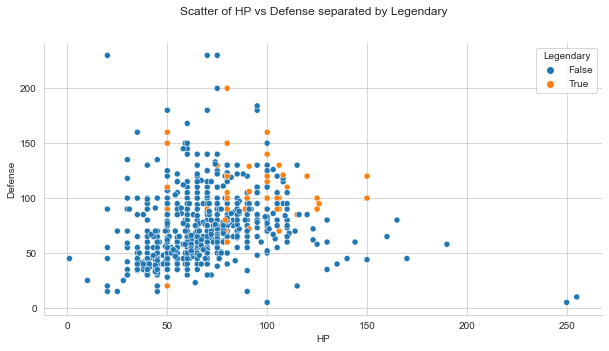

In [39]:
# distribution of HP and defense stats seperated by legendary status
plt.figure(figsize=(10,5))
sns.scatterplot(x = "HP", y= "Defense", hue = "Legendary", data = pokemon,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Scatter of HP vs Defense separated by Legendary")
plt.show()
#fig = px.scatter(pokemon,x = "HP", y= "Defense", color="Legendary", title = "Scatter of HP vs Defense separated by Legendary")
#fig.show()
